<a href="https://colab.research.google.com/github/fredymendezbustamante/MODELADO_Y_SIMULACION-/blob/master/modelado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FREDY ALEXANDER MENDEZ BUSTAMANTE  COD:816539
# PROYECTO FINAL MODELADO Y SIMULACIÓN


#El mapa logistico

$Resumen$

Para entender mejor qué es el caos exploremos el famoso mapa logístico, sin duda una de las ecuaciones más famosas en la ciencia de los sistemas dinámicos.
El mapa logístico representa un modelo sencillo para intentar explicar la dinámica de una población de la que se ha supuesto que tiene un crecimiento cada vez más lento a medida que se acerca a una cantidad de individuos considerada como límite. 

$palabras$ $clave $

 Bifurcación, Crecimiento poblacional, Fluctuación, Declives, Caos, mapa logístico.

$Introducción $

La aplicación logística o ecuación logística es una aplicación matemática que se hizo muy conocida en 1976 gracias a un artículo científico del biólogo Robert May y que fue estudiada más en profundidad por el físico Mitchell Feigenbaum. May pretendía hallar un modelo demográfico1​ sencillo que explicase la dinámica de una población de la que se ha supuesto que tiene un crecimiento cada vez más lento a medida que se acerca a una cantidad de individuos considerada como límite.
May comprobó que al cambiar los valores del único parámetro del modelo este presentaba soluciones muy distintas y a veces muy complejas pese a que se trata de una simple aplicación polinómica de grado 2.
El modelo simplifica al combinar los efectos de la tasa de natalidad y la tasa de mortalidad en un solo número, llamado $a$ (May, 1976). El tamaño de la población se reemplaza por un concepto relacionado "fracción de la capacidad de carga", llamado $x$. Su expresión matemática es la siguiente:

$$x_{t+1}=a x_{t}\left(1-x_{t}\right)$$

Esta ecuación define las reglas o dinámicas de nuestro sistema: $x$ representa la población en un momento dado $t,$ y $a$ representa la tasa de crecimiento. En otras palabras, el nivel de población en un momento dado es una función del parámetro de la tasa de crecimiento y el nivel de población del intervalo de tiempo anterior. Si la tasa de crecimiento es demasiado baja, la población se extinguirá. Las tasas de crecimiento más altas podrían establecerse hacia un valor estable o fluctuar a través de una serie de auges y declives de la población. Como podemos ver, es una ecuación muy simple, la más simple en capturar la esencia del caos.











#Modelamiento de la ecuación

vamos a modelar una población de conejos.

si tengo X cantidad de conejos este año, cuantos conejos tendre el proximo año, el modelo mas simple que podemos observar es:

$$x_{}$$ 
 y lo multiplicamos por un numeor $a$, al cual corresponde a la tasa de crecimiento, de la siguiente manera:

 $$ax_{}$$  

 si $a=2$, entonces:

 $$2x_{}$$  

 si $a=2$, implicaria que la poblacion se duplicaría cada año, pero este tiene un problema, el cual asumiriamos que la poblacion de conejos creceria exponencialmente para siempre.

 Entonces agregamos el termino: $$\left(1-x_{}\right)$$

 para representar las restricciones del entorno.

 Ojo, aqui debemos imaginar que la poblacion $x$ es un porcentaje del maximo teorico, entonces va desde 0 a 1 y cuando se aproxima a ese maximo ese termino tiende a cero. 

 Así:$$\left(1-1\right)=0$$

 y de esta manera se limita la población.

 entonces consideramos la plaicacion logistica de la siguiente manera:

 $$x_{t+1}=a x_{t}\left(1-x_{t}\right)$$


#PLANTEAMIENTO DEL PROBLEMA Y METODOLOGÍA

In [8]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
def mapa(a,x):

    der = a*(1.-2.*x)
    return a*x*(1.-x), der

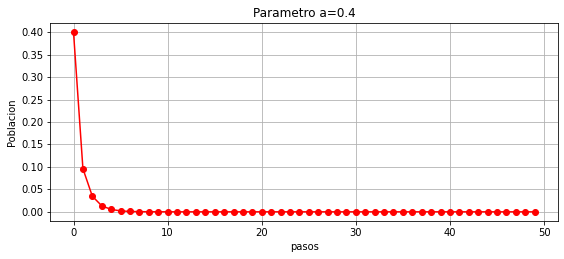

In [5]:
from matplotlib.ticker import NullFormatter
def lyap(a, x):
    xcp = x;
    acum = 0;
    der  = 0;
    (xcp,der)  = mapa(a,xcp)
    for i in range(1000):
        if (der != 0.):
            acum = acum + np.log(np.abs(der));
        (xcp,der)  = mapa(a,xcp)

    return acum/1000.


x      = 0.4 # valor de la poblacion inicial
a      = 0.4 # parametro a
npasos = 50  # generaciones a calcular


xa=np.zeros(npasos)
xa[0]=x 

for i in range(0,npasos-1):
    (xa[i+1],foo) = mapa(a,xa[i]);

    (xa[i]);


plt.figure(figsize=(20,8))    
plt.subplot(221)
plt.xlabel("pasos")
plt.ylabel("Poblacion")
plt.title("Parametro a=" + str(a))
plt.grid(True)
plt.plot(xa, 'ro-')
plt.show()

# RESULTADOS

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


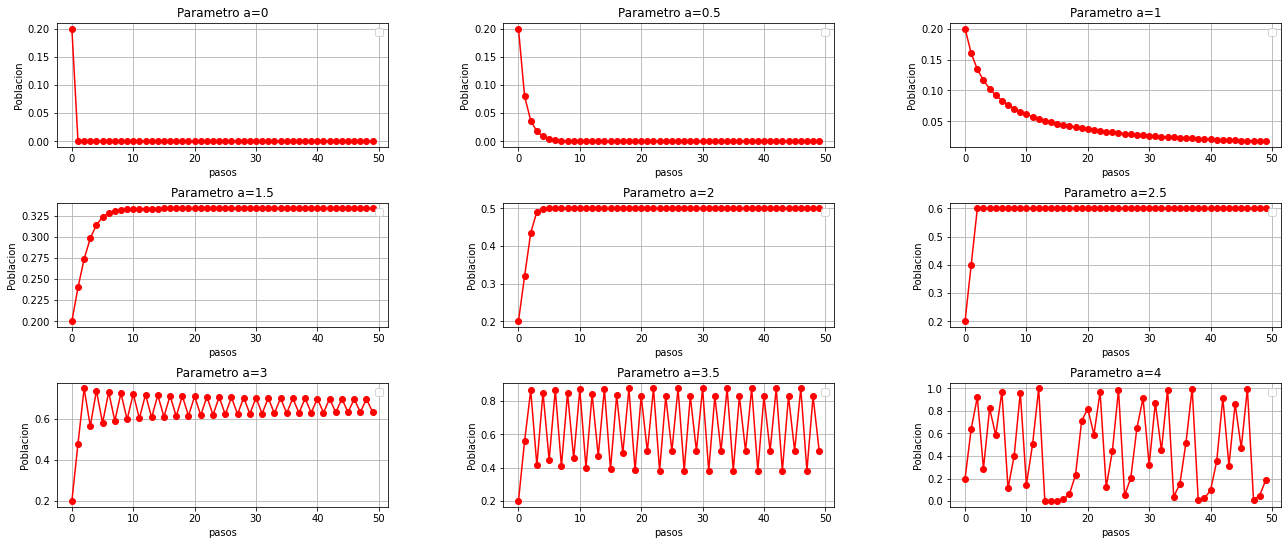

In [6]:
from matplotlib.ticker import NullFormatter
def lyap(a, x):
    xcp = x;  # crecimiento poblacional 
    acum = 0;
    der  = 0;
    (xcp,der)  = mapa(a,xcp)
    for i in range(100):
        if (der != 0.):
            acum = acum + np.log(np.abs(der));
        (xcp,der)  = mapa(a,xcp)

    return acum/100.


x      = 0.2  # valor de la poblacion inicial
a      = 0    # parametro a
npasos = 50   # generaciones a calcular
a1     = 0.5  # parametro a
a2     = 1    # parametro a
a3     = 1.5  # parametro a
a4     = 2    # parametro a
a5     = 2.5  # parametro a
a6     = 3    # parametro a
a7     = 3.5  # parametro a
a8     = 4    # parametro a

xa=np.zeros(npasos)
xa[0]=x 

for i in range(0,npasos-1):
    (xa[i+1],foo) = mapa(a,xa[i]);

    (xa[i]);

xa1=np.zeros(npasos)
xa1[0]=x 

for i in range(0,npasos-1):
    (xa1[i+1],foo) = mapa(a1,xa1[i]);

    (xa1[i]);   

xa2=np.zeros(npasos)
xa2[0]=x 

for i in range(0,npasos-1):
    (xa2[i+1],foo) = mapa(a2,xa2[i]);

    (xa2[i]); 

xa3=np.zeros(npasos)
xa3[0]=x 

for i in range(0,npasos-1):
    (xa3[i+1],foo) = mapa(a3,xa3[i]);

    (xa3[i]);  

xa4=np.zeros(npasos)
xa4[0]=x 

for i in range(0,npasos-1):
    (xa4[i+1],foo) = mapa(a4,xa4[i]);

    (xa4[i]);  

xa5=np.zeros(npasos)
xa5[0]=x 

for i in range(0,npasos-1):
    (xa5[i+1],foo) = mapa(a5,xa5[i]);

    (xa5[i]);  

xa6=np.zeros(npasos)
xa6[0]=x 

for i in range(0,npasos-1):
    (xa6[i+1],foo) = mapa(a6,xa6[i]);

    (xa6[i]);   

xa7=np.zeros(npasos)
xa7[0]=x 

for i in range(0,npasos-1):
    (xa7[i+1],foo) = mapa(a7,xa7[i]);

    (xa7[i]);

xa8=np.zeros(npasos)
xa8[0]=x
for i in range(0,npasos-1):
    (xa8[i+1],foo) = mapa(a8,xa8[i]);

    (xa8[i]);              





plt.figure(figsize=(20,8))    
plt.subplot(331)
plt.xlabel("pasos")
plt.ylabel("Poblacion")
plt.title("Parametro a=" + str(a))
plt.grid(True)
plt.plot(xa, 'ro-')
plt.legend()

plt.subplot(332)
plt.xlabel("pasos")
plt.ylabel("Poblacion")
plt.title("Parametro a=" + str(a1))
plt.plot(xa1, 'ro-')
plt.grid(True)
plt.legend()

plt.subplot(333)
plt.xlabel("pasos")
plt.ylabel("Poblacion")
plt.title("Parametro a=" + str(a2))
plt.grid(True)
plt.plot(xa2, 'ro-')
plt.legend()

plt.subplot(334)
plt.xlabel("pasos")
plt.ylabel("Poblacion")
plt.title("Parametro a=" + str(a3))
plt.grid(True)
plt.plot(xa3, 'ro-')
plt.legend()

plt.subplot(335)
plt.xlabel("pasos")
plt.ylabel("Poblacion")
plt.title("Parametro a=" + str(a4))
plt.plot(xa4, 'ro-')
plt.grid(True)
plt.legend()

plt.subplot(336)
plt.xlabel("pasos")
plt.ylabel("Poblacion")
plt.title("Parametro a=" + str(a5))
plt.grid(True)
plt.plot(xa5, 'ro-')
plt.legend()

plt.subplot(337)
plt.xlabel("pasos")
plt.ylabel("Poblacion")
plt.title("Parametro a=" + str(a6))
plt.grid(True)
plt.plot(xa6, 'ro-')
plt.legend()

plt.subplot(338)
plt.xlabel("pasos")
plt.ylabel("Poblacion")
plt.title("Parametro a=" + str(a7))
plt.plot(xa7, 'ro-')
plt.grid(True)
plt.legend()

plt.subplot(339)
plt.xlabel("pasos")
plt.ylabel("Poblacion")
plt.title("Parametro a=" + str(a8))
plt.grid(True)
plt.plot(xa8, 'ro-')
plt.legend()

plt.gca().yaxis.set_minor_formatter(NullFormatter())

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45,
                    wspace=0.35)

plt.show()



#RESULTADOS

#Atractores
Hasta aquí, el sistema parece tener un comportamiento bastante predecible y parece ser estable. En los sistemas dinámicos, un Atractor es un valor, o conjunto de valores hacia los que el sistema tienen a evolucionar en el tiempo y estabilizarse. En nuestro ejemplo, cuando el parámetro de crecimiento es 0.5, el sistema tiene un Atractor de punto fijo en el nivel de población 0 como se muestra en la línea amarilla. En otras palabras, el valor de la población tiende a 0 con el tiempo a medida que el modelo va evolucionando. Cuando el parámetro de tasa de crecimiento es 3.5, el sistema oscila entre cuatro valores, como se muestra en la línea gris. Este otro Atractor se llama de ciclo límite.

Lo verdaderamente interesante se produce cuando aumentamos el valor de la tasa de crecimiento a un valor superior a 4, en ese momento el sistema se vuelve caótico.

# Diagrama de bifurcación
Para poder ver claramente como el sistema evoluciona hacia un comportamiento caótico, en los sistemas dinámicos se suele recurrir a la ayuda de un diagrama de bifurcación. Analizando la evolución de nuestra función, podemos ver que en las diferentes iteraciones con los valores de $a$ entre $0 \mathrm{y} 4 ;$ el sistema fue evolucionando hacia Atractor de punto fijo, luego hacia otro de ciclo límite de 2 valores, un siguiente de 4 , luego otro de 8 , y así sucesivamente hasta llegar al caos. Cada uno de estos ciclos son llamadas bifurcaciones. Estas bifurcaciones a menudo se resumen en un llamado diagrama de bifurcación que traza el Atractor en el que termina el sistema en función del valor de un "parámetro de control", que en nuestro caso es el valor de la tasa de crecimiento $a$.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

overflow encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

overflow encountered in double_scalars



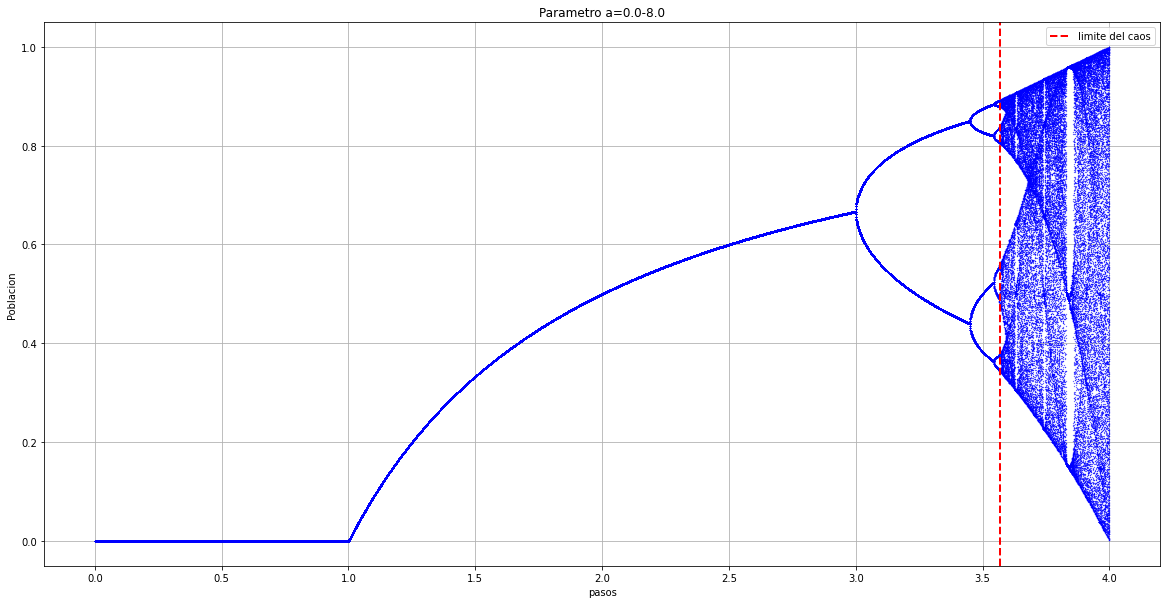

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mapa(a,x):

    der = a*(1.-2.*x)
    return a*x*(1.-x), der

def lyap(a, x):

    xcp = x
    acum = 0.
    der  = 0.
    (xcp,der)  = mapa(a,xcp)
    for i in range(100):
        if (der != 0.):
            acum = acum + np.log(np.abs(der))
        (xcp,der)  = mapa(a,xcp)

    return acum/100.


xini = 0.45565665


npasos=10000
niter=100
xa=np.zeros((npasos*niter))
a=np.zeros((npasos*niter))

a1 = 0 #valor de a min
a2 = 8 # valor de a max



h=(a2-a1)/(npasos-1)
for i in range(0,npasos):
    a[niter*i] = a1+i*h 
    x=xini
    for j in range(0,10000):
        (x,foo) = mapa(a[i*niter],x)
    
    xa[niter*i]=x
    for j in range(0,niter-1):
        a[i*niter+j+1] = a1+i*h
        (xa[i*niter+j+1],foo) = mapa(a[i*niter],xa[i*niter+j])




plt.figure(figsize=(20,10))           
plt.xlabel("pasos")
plt.ylabel("Poblacion")
plt.title("Parametro a=" + str(a[0]) + '-' + str(a[niter*npasos-1]))
#for i in range(0,npasos):
plt.plot(a,xa, 'b.',markersize=0.5)
plt.axvline(3.57,label='limite del caos',color = "red", linewidth = 2, linestyle = "dashed")
plt.legend()
plt.grid(True)
plt.show()



#RESULTADOS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mapa(a,x):

    der = a*(1.-2.*x)
    return a*x*(1.-x), der

def lyap(a, x):

    xcp = x
    acum = 0.
    der  = 0.
    (xcp,der)  = mapa(a,xcp)
    for i in range(100):
        if (der != 0.):
            acum = acum + np.log(np.abs(der))
        (xcp,der)  = mapa(a,xcp)

    return acum/100.


xini = 0.45565665


npasos=1000
niter=100
xa=np.zeros((npasos*niter))
a=np.zeros((npasos*niter))

a1 = 0 #valor de a min
a2 = 8 # valor de a max



h=(a2-a1)/(npasos-1)
for i in range(0,npasos):
    a[niter*i] = a1+i*h 
    x=xini
    for j in range(0,10000):
        (x,foo) = mapa(a[i*niter],x)
    
    xa[niter*i]=x
    for j in range(0,niter-1):
        a[i*niter+j+1] = a1+i*h
        (xa[i*niter+j+1],foo) = mapa(a[i*niter],xa[i*niter+j])




plt.figure(figsize=(20,10))           
plt.xlabel("pasos")
plt.ylabel("Poblacion")
plt.title("Parametro a=" + str(a[0]) + '-' + str(a[niter*npasos-1]))
#for i in range(0,npasos):
plt.plot(a,xa, 'b.',markersize=0.5)
plt.axvline(3.57,label='limite del caos',color = "red", linewidth = 2, linestyle = "dashed")
plt.legend()
plt.grid(True)
plt.show()




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

overflow encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

overflow encountered in double_scalars



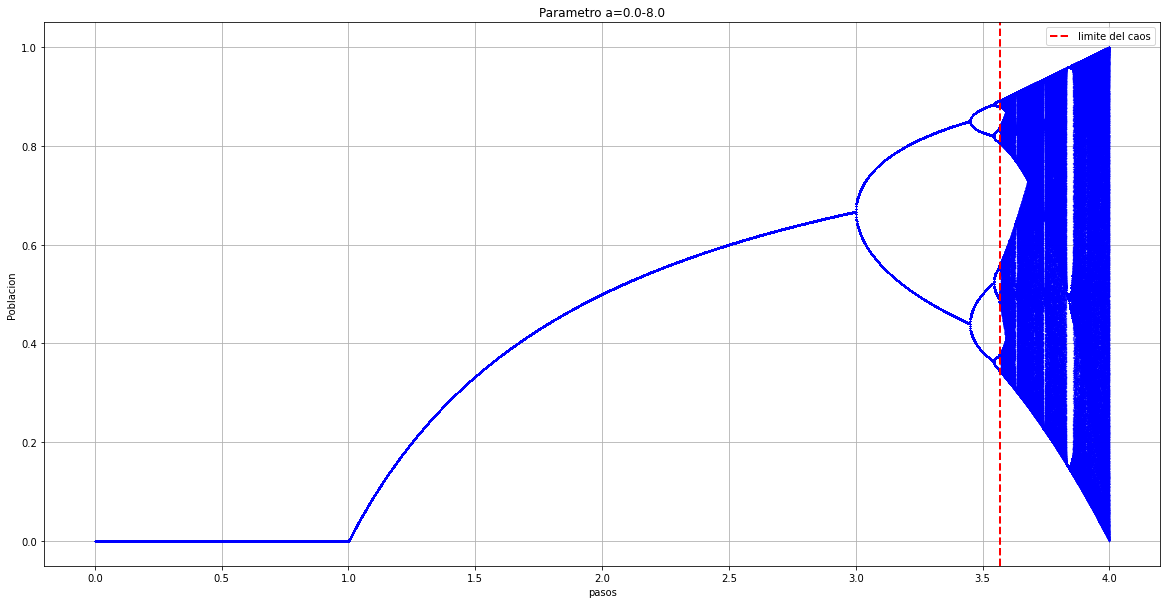

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mapa(a,x):

    der = a*(1.-2.*x)
    return a*x*(1.-x), der

def lyap(a, x):

    xcp = x
    acum = 0.
    der  = 0.
    (xcp,der)  = mapa(r,xcp)
    for i in range(100):
        if (der != 0.):
            acum = acum + np.log(np.abs(der))
        (xcp,der)  = mapa(r,xcp)

    return acum/100.


xini = 0.45565665


npasos=10000
niter=1000
xa=np.zeros((npasos*niter))
a=np.zeros((npasos*niter))

a1 = 0 #valor de a min
a2 = 8 # valor de a max



h=(a2-a1)/(npasos-1)
for i in range(0,npasos):
    a[niter*i] = a1+i*h 
    x=xini
    for j in range(0,10000):
        (x,foo) = mapa(a[i*niter],x)
    
    xa[niter*i]=x
    for j in range(0,niter-1):
        a[i*niter+j+1] = a1+i*h
        (xa[i*niter+j+1],foo) = mapa(a[i*niter],xa[i*niter+j])




plt.figure(figsize=(20,10))           
plt.xlabel("pasos")
plt.ylabel("Poblacion")
plt.title("Parametro a=" + str(a[0]) + '-' + str(a[niter*npasos-1]))
#for i in range(0,npasos):
plt.plot(a,xa, 'b.',markersize=0.5)
plt.axvline(3.57,label='limite del caos',color = "red", linewidth = 2, linestyle = "dashed")
plt.legend()
plt.grid(True)
plt.show()






# Esta ecuanción tiene una gran aplicacion que es:
###Caos de baja dimensión en el tejido cardíaco

Caos es un término utilizado para caracterizar la actividad aperiódica que surge en un sistema dinámico, o en un conjunto de ecuaciones que describen la evolución temporal del sistema como resultado de un mecanismo determinista que tiene una dependencia sensible de las condiciones iniciales. En ese sentido, se ha propuesto que el caos hace una contribución importante a los ritmos cardíacos normales y anormales. Sin embargo, hasta la fecha, las descripciones del caos en el tejido cardíaco se han limitado principalmente a marcapasos cardíacos forzados periódicamente. Debido a que muchas alteraciones del ritmo cardíaco, en particular las iniciadas o perpetuadas por la excitación reentrante, se originan en tejidos cardíacos sin marcapasos, las demostraciones de caos en tejido sin marcapasos pueden proporcionar una explicación determinista para una amplia variedad de arritmias complejas. Aquí presentamos evidencia experimental de patrones caóticos de activación y características de potencial de acción en fibras de Purkinje y músculo ventricular no activas y no espontáneamente impulsadas externamente. 

Los resultados indican que existe un vínculo aparente entre el mecanismo del caos de baja dimensión y la aparición de respuestas reflejadas que podrían conducir a fenómenos más desorganizados espacialmente. Se persigue un mecanismo detallado para el caos de baja dimensión observado experimentalmente utilizando un modelo de ecuación en diferencias. Las características críticas del modelo incluyen una relación no monótona entre el tiempo de recuperación durante la estimulación rítmica y el estado de las propiedades de la membrana, y una recuperación muy inclinada de las propiedades de la membrana en ciertos rangos de tiempos de recuperación.


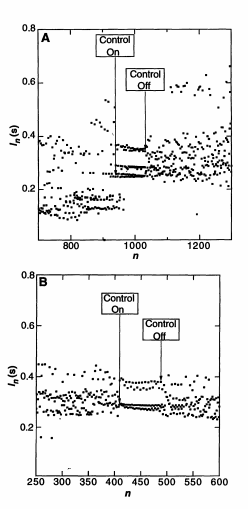

#Conclusiones

* En el contexto del ritmo sinusal, la variabilidad de la frecuencia cardiaca refleja el funcionamiento del sistema nervioso autónomo. La variabilidad del ritmo cardiaco puede ser caótica. Sin embargo, este comportamiento se atenúa mediante el bloqueo parasimpático con atropina. En condiciones normales, la variabilidad del ritmo cardiaco tiene rasgos fractales. La pérdida de la fractalidad refleja una degradación de la complejidad del sistema nervioso autónomo. Mediante el estudio no lineal de los ritmos cardiacos, podemos apreciar la resiliencia de nuestro principal sistema adaptativo complejo. Ya se dejó asentado, que el sistema eléctrico cardiaco y la circulación pulmonar son fractales. Esta peculiaridad les otorga una gran capacidad de transmisión y distribución.

* La frecuencia cardiaca de los individuos sanos tiende a un atractor extraño, mientras que la frecuencia cardiaca de un individuo enfermo tiende a un atractor de punto fijo.
El caos no siempre es indeseable en un sistema, debido a que un comportamiento estrictamente periódico es perjudicial para muchos organismos en términos fisiológicos
La frecuencia cardiaca se comporta de forma caótica, su ritmo es siempre irregular, aún en estado de reposo.

* El ciclo cardiaco contradice el principio de homeostasia, regidor de toda la conceptualización fisiológica antigua donde se asume que salud es igual a regularidad en tanto que enfermedad es lo contrario
El estudio de la actividad cardiaca tiene la facultad de proveer información sobre las condiciones fisiológicas y patológicas de los pacientes, esto brinda la posibilidad de diagnosticar a tiempo problemas y por tanto optimizar la toma de decisiones.

* La frecuencia cardiaca se comporta de forma caótica, su ritmo es siempre irregular, aún en estado de reposo, esto vuelve obsoleto el paradigma de salud clásico.

* Esta metodología de análisis de la actividad cardiaca aún se encuentra en desarrollo, por ende la medicina tradicional no la ha adoptado como procedimiento fundamental para el diagnóstico de sus pacientes. 

$Bibliografía$

* May, R. M. (10 de june de 1976).simple  mathematical models with very           complicated dynamics. review article, págs. 459-467.


* Wikipedia. (17 de abril de 2020). Aplicacion logistica. Obtenido de Wikipedia : https://es.wikipedia.org/wiki/Aplicaci%C3%B3n_log%C3%ADstica

* Audelo, E., Beristain, F., & Vázquez, C. (2007). Nuevos Patrones de Reconocimiento Visual en el Ciclo Cardiaco. Información tecnológica, 18(6). doi:10.4067/S0718-07642007000600007

* Burgos, Luis. (1994) Importancia del caos determinista en medicina. En: Iatreianol 7/No. 2. Disponible en: http://www.iatreia.udea.edu.co/index.php/iatreia/article/viewFile/537/456

* Savi, M. A. (2005). Chaos and order in biomedical rhythms. Journal of the Brazilian Society of Mechanical Sciences and Engineering, 27(2). doi:10.1590/S1678-58782005000200008

* Dante R. chialvo, R. F. (15 de febrero de 1990). Low dimensional chaos in cardiac tissue. LETTERS TO NATURE, págs. 653-657.

* Garfinkel A, Spano ML, Ditto WL, Weiss JN. Controlling cardiac chaos. Science. 1992 Aug 28;257(5074):1230-5. doi: 10.1126/science.1519060. PMID: 1519060.
